In [1]:
                    #COVID-19 Spread CaseStudy

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [4]:
df=pd.read_csv('covid_19_india.csv',parse_dates=['Date'],dayfirst=True)

C:\Users\ravin\AppData\Local\Temp\ipykernel_39212\689802896.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df=pd.read_csv('covid_19_india.csv',parse_dates=['Date'],dayfirst=True)


In [5]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [6]:
#Keeping only required columns
df=df[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]
#renaming column names
df.columns=['date','state','cured','deaths','confirmed']

In [7]:
#looking at the earlier dates
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [8]:
#looking at the latest dates
df.tail()

,date,state,cured,deaths,confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


In [9]:
df.shape

(18110, 5)

In [14]:
#current date 
today=df[df.date=='2021-08-11']
today

,date,state,cured,deaths,confirmed
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18076,2021-08-11,Arunachal Pradesh,47821,248,50605
18077,2021-08-11,Assam,559684,5420,576149
18078,2021-08-11,Bihar,715352,9646,725279
18079,2021-08-11,Chandigarh,61150,811,61992
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18081,2021-08-11,Dadra and Nagar Haveli and Daman and Diu,10646,4,10654
18082,2021-08-11,Delhi,1411280,25068,1436852
18083,2021-08-11,Goa,167978,3164,172085


In [16]:
#sorting date w.r.t number of confirmed cases
max_confirmed_cases=today.sort_values(by='confirmed',ascending=False)
max_confirmed_cases

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999
18082,2021-08-11,Delhi,1411280,25068,1436852
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18099,2021-08-11,Odisha,972710,6565,988997


In [20]:
#Getting states with maximum number of confirmed cases
top_states_confirmed=max_confirmed_cases[0:5]
top_states_confirmed

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


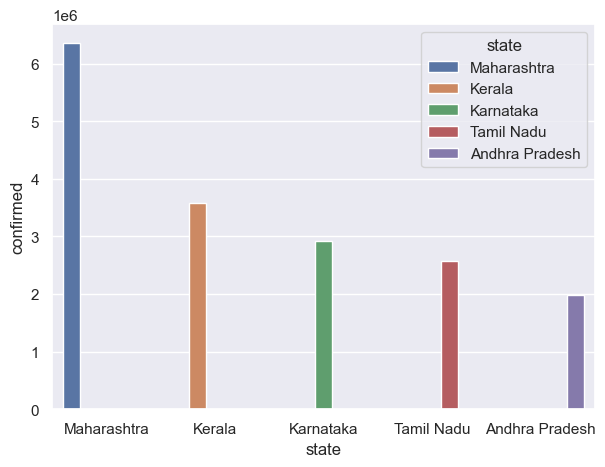

In [22]:
#making bar-plot for states with top confirmed cases
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x='state',y='confirmed',data=top_states_confirmed,hue='state')
plt.show()

In [24]:
#Sorting data w.r.t number of death cases
max_death_cases=today.sort_values(by='deaths',ascending=False)
max_death_cases

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18082,2021-08-11,Delhi,1411280,25068,1436852
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999
18090,2021-08-11,Kerala,3396184,18004,3586693
18101,2021-08-11,Punjab,582791,16322,599573
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18080,2021-08-11,Chhattisgarh,988189,13544,1003356


In [27]:
#Getting states with maxinum number of death cases
top_states_death=max_death_cases[0:5]
top_states_death

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18082,2021-08-11,Delhi,1411280,25068,1436852
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


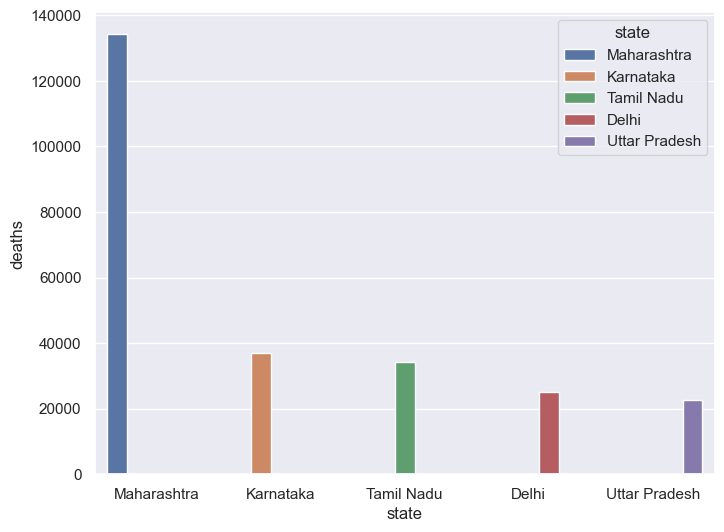

In [30]:
#Making bar-plot for states with top death cases
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x='state',y='deaths',data=top_states_death,hue='state')
plt.show()

In [31]:
#Sorting data w.r.t number of cured cases
max_cured_cases=today.sort_values(by='cured',ascending=False)
max_cured_cases

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999
18082,2021-08-11,Delhi,1411280,25068,1436852
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18099,2021-08-11,Odisha,972710,6565,988997


In [33]:
top_states_cured=max_cured_cases[0:5]

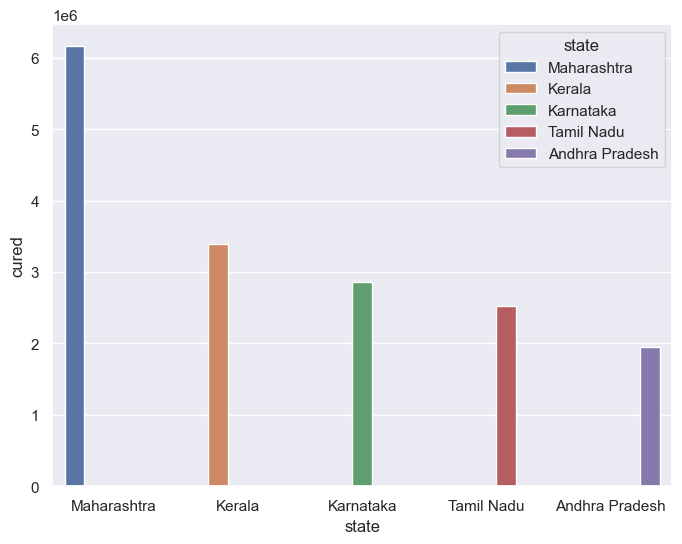

In [34]:
#Making a bar-plot for states with top death cases
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x='state',y='cured',data=top_states_cured,hue='state')
plt.show()

In [42]:
#Maharashtra
maha=df[df.state=='Maharashtra']
maha

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833


C:\Users\ravin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ravin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


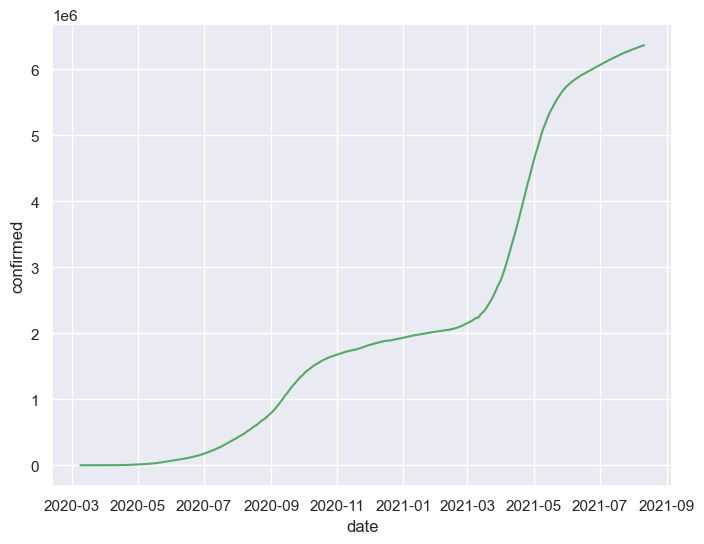

In [43]:
#visualizing confirmed cases in maha
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(x='date',y='confirmed',data=maha,color='g')
plt.show()

C:\Users\ravin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ravin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


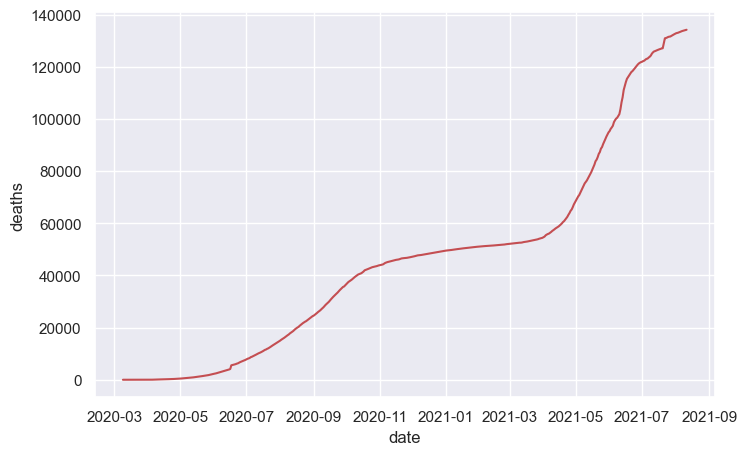

In [44]:
#visualizing death cases in maha
sns.set(rc={'figure.figsize':(8,5)})
sns.lineplot(x='date',y='deaths',data=maha,color='r')
plt.show()

In [46]:
#kerala
kerala=df[df.state=='Kerala']
kerala

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
17946,2021-08-07,Kerala,3317314,17515,3513551
17982,2021-08-08,Kerala,3337579,17654,3533918
18018,2021-08-09,Kerala,3357687,17747,3552525
18054,2021-08-10,Kerala,3377691,17852,3565574


C:\Users\ravin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ravin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


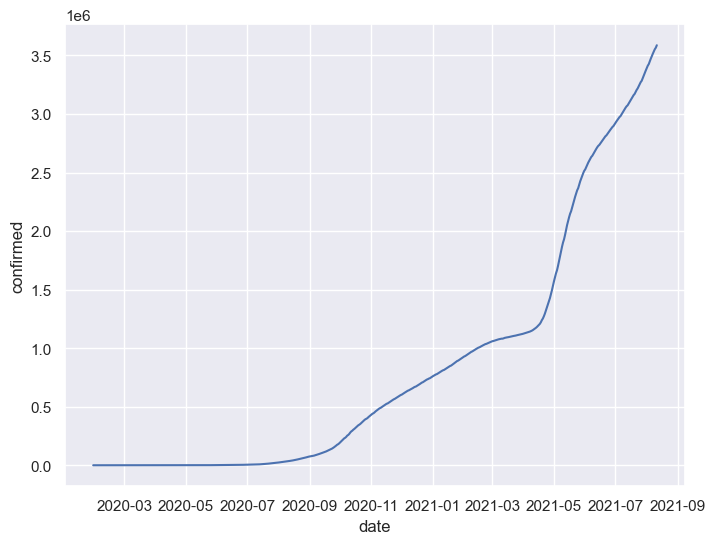

In [47]:
#visualizing the confirmed cases in kerala
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(x='date',y='confirmed',data=kerala,color='b')
plt.show()

C:\Users\ravin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ravin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


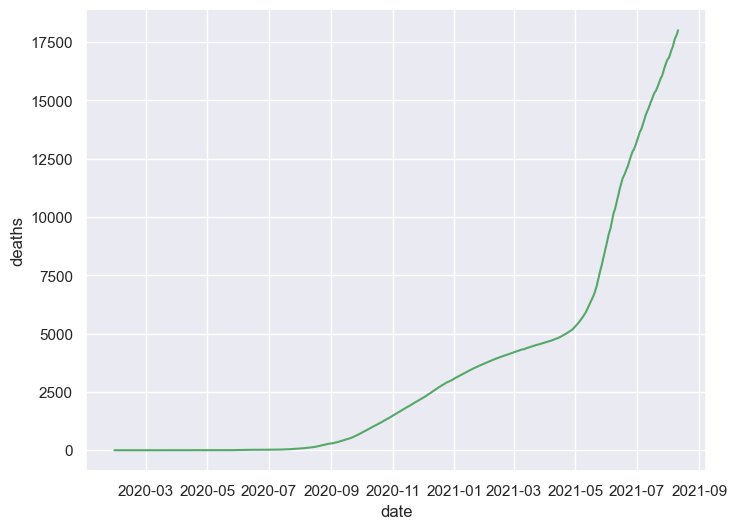

In [48]:
#visualizing death cases in kerala
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(x='date',y='deaths',data=kerala,color='g')
plt.show()

In [50]:
#jammu and kashmir
jk=df[df.state=='Jammu and Kashmir']
jk

,date,state,cured,deaths,confirmed
81,2020-03-09,Jammu and Kashmir,0,0,1
96,2020-03-10,Jammu and Kashmir,0,0,1
106,2020-03-11,Jammu and Kashmir,0,0,1
117,2020-03-12,Jammu and Kashmir,0,0,1
130,2020-03-13,Jammu and Kashmir,0,0,1
...,...,...,...,...,...
17943,2021-08-07,Jammu and Kashmir,316496,4386,322286
17979,2021-08-08,Jammu and Kashmir,316632,4386,322428
18015,2021-08-09,Jammu and Kashmir,316761,4389,322550
18051,2021-08-10,Jammu and Kashmir,316957,4390,322658


C:\Users\ravin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ravin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


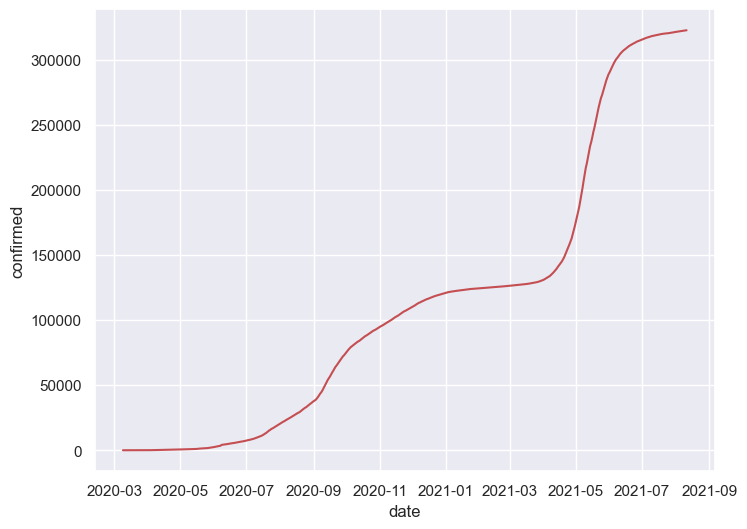

In [51]:
#visualizing confirmed cases in jammu and kashmir
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(x='date',y='confirmed',data=jk,color='r')
plt.show()

In [53]:
#checking state_wise testing details
tests=pd.read_csv('StatewiseTestingDetails.csv')
tests

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN


In [58]:
test_latest=tests[tests.Date=='2021-08-10']
test_latest

,Date,State,TotalSamples,Negative,Positive
940,2021-08-10,Andhra Pradesh,25311733.0,23326551,NaN
1417,2021-08-10,Arunachal Pradesh,986281.0,NaN,NaN
1886,2021-08-10,Assam,19850867.0,NaN,NaN
2375,2021-08-10,Bihar,38820518.0,NaN,NaN
2854,2021-08-10,Chandigarh,629060.0,565758,NaN
3336,2021-08-10,Chhattisgarh,11762041.0,NaN,NaN
3995,2021-08-10,Delhi,24333906.0,NaN,NaN
4478,2021-08-10,Goa,1102474.0,NaN,NaN
4965,2021-08-10,Gujarat,26192626.0,NaN,NaN
5457,2021-08-10,Haryana,11135555.0,NaN,NaN


In [59]:
#linear Regression
from sklearn.model_selection import train_test_split

In [60]:
maha

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833


In [61]:
#converting date_time to ordinal
maha['date']=maha['date'].map(dt.datetime.toordinal)
maha.head()

C:\Users\ravin\AppData\Local\Temp\ipykernel_39212\1692371427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha['date']=maha['date'].map(dt.datetime.toordinal)


,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [62]:
#getting dependent variable and indepedent variable
x=maha['date']
y=maha['confirmed']

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [65]:
from sklearn.linear_model import LinearRegression

In [67]:
lr=LinearRegression()

In [68]:
y_train

9886     1913382
7805     1654028
6475     1188015
10390    1961975
11506    2046287
          ...   
11902    2087632
4900      468265
605          335
4305      310455
15682    5805565
Name: confirmed, Length: 364, dtype: int64

In [70]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [71]:
maha.tail()

,date,state,cured,deaths,confirmed
17950,738009,Maharashtra,6130137,133717,6341759
17986,738010,Maharashtra,6139493,133845,6347820
18022,738011,Maharashtra,6144388,133996,6353328
18058,738012,Maharashtra,6151956,134064,6357833
18094,738013,Maharashtra,6159676,134201,6363442


In [73]:
lr.predict(np.array([[738013]]))

array([[5432680.8501873]])